classification, classic ML / Naive-Bayes

In [60]:
# usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# NLP -specific imports

# CountVectorizer => the most simple vectorizing tool for text data 
from sklearn.feature_extraction.text import CountVectorizer

# import the multinomial Naive-Bayes (supports more than 2 outcomes too!)
from sklearn.naive_bayes import MultinomialNB



## Based my Own data set First I downlaoded Excel file the convert into CVC file

# Its a copy of news name text classification but difference is, I experienced it with Categoreis instead of news name, Only the difference with category colum instead targeted variable name

In [61]:
# Converting Xlsx file into CVC file
# I download this file from this url https://data.mendeley.com/datasets/pk5vs5wjxm/1?utm_source=chatgpt.com


# Load the Excel file
#xlsx_file = "NewsRecommendationDataset.xlsx"
# Convert the first sheet to CSV
# df = pd.read_excel(xlsx_file, sheet_name=0)
# df.to_csv("News_Recommended.csv", index=False)

In [62]:


# In this experiment I saw bit improvement before removing stopewords, there was 90 percent model accury with categories colums but
# after apply stopwards removing fuction i got 93 percent which is slighly better results.

# Stopword removal led to a slight increase in accuracy for Econonmy category, which had the highest correct predictions.
# Minimal change in performance for The Economy and Envoirment, suggesting the model is fairly robust.
# Applying stopwords appears to reduce overfitting to less informative words, improving generalization for at least one class

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import multiprocessing as mp

# remove stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/waseemimran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:

# I experiment also with this but model works nothing changes, It was same as working with stopwords logic.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text): 
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [64]:
# vectorizer = CountVectorizer(stop_words='english')
# vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
# ngram_range=(1, 2) means: include unigrams (1-word phrases) and bigrams (2-word phrases)

# I also tried this approach with (1, 3) to include trigrams as well. But...
# I got good model performane with previous approaches, in which model accurecy was 93 or 94 percent which is really good

In [65]:
# load data and see what's inside
df = pd.read_csv("News_Recommended.csv")

df.tail()

,headlines,newspaper,description,catagories,link
1994,Educational Studies Technology Democracy defi...,Prothom Alo,Speakers on the second day of the two-day 1st ...,Technology,https://en.prothomalo.com/bangladesh
1995,Taylor Swift's tour arrives to shake up Europe,Prothom Alo,"The Eras Tour, which began in March 2023, is a...",Entertainment,https://en.prothomalo.com/bangladesh
1996,"National Bank hasn’t been taken over, says new...",Prothom Alo,Khalilur Rahman made the remarks while address...,Business,https://en.prothomalo.com/bangladesh
1997,Health FAgricultures of the 2023 US Human ...,Prothom Alo,We must inquire into how the US State Departme...,Health,https://en.prothomalo.com/bangladesh
1998,Health Election year 2024: Will the polls ...,Prothom Alo,What is the role of elections in countries whe...,Health,https://en.prothomalo.com/bangladesh


In [66]:
# Basic info
print("Total samples:", len(df))
print( df['description'].value_counts())

# Check a few samples
df.head()

Total samples: 1999
description
Arifin Shuvoo’s first look from ‘Neel Chokro’ unveiled                                                                                                  18
Environment protection : ‘Amra Mali’ an exceptional idea of Durbar Tarunnow                                                                             18
Which type of desktop PC to buy?                                                                                                                        18
Riseup Labs: Rising a Next-Generation Bangladeshi ITES company                                                                                          18
Sustainability Report 2023: Siegwerk Reduces Greenhouse Gas Emissions by 9 Percent                                                                      18
                                                                                                                                                        ..
The High Court orders the closure of s

,headlines,newspaper,description,catagories,link
0,MV Abdullah leaves UAE for last leg of homewar...,The Daily Star,"The ship MV Abdullah, with 23 Bangladeshi crew...",Business,https://www.thedailystar.net/Health
1,"Heatwave: After fiery April, milder May beckons",The Daily Star,Relief from a severe heatwave expected in May ...,Weather,https://www.thedailystar.net/Health
2,Bar pharmas from raising medicine prices at will,The Daily Star,High Court orders measures to prevent pharmace...,Healthcare,https://www.thedailystar.net/Health
3,IMF Loan: Govt may miss two key targets set fo...,The Daily Star,Concerns raised over government potentially fa...,Economy,https://www.thedailystar.net/Health
4,Columbia University suspends pro-Palestinian p...,The Daily Star,Disciplinary action taken against pro-Palestin...,Education,https://www.thedailystar.net/Health


In [67]:

df['catagories'].value_counts()


catagories
Environment             203
Politics                149
Economy                 141
Sports                  123
Health                  120
                       ... 
Border Security           1
Urban Planning            1
Health, Weather           1
Education, Diplomacy      1
Health, Environment       1
Name: count, Length: 209, dtype: int64

In [68]:
# Experiment with the colum only description also for some more data combined (description and headlines)
# Accuracy dropped from 0.91 (description only) to 0.90 (combined).
# For all three classes , the precision, recall, and F1-scores were slightly higher when using only the description.
# The macro and weighted averages of precision, recall, and F1-score also showed a slight decline when using combined features.


# apply the function to the 'headline' column
# df['headlines'] = df['headlines'] + " - " + df['description'].apply(remove_stopwords)
#df['headlines'] = df['headlines'] + " - " + df['description']

# Combine and process the text
# df['headlines'] = (df['headlines'] + " - " + df['description']) \
#     .apply(remove_stopwords) \
#     .apply(stem_text)

df['headlines'] = df['headlines'] + " - " + df['description'].apply(remove_stopwords)
df

,headlines,newspaper,description,catagories,link
0,MV Abdullah leaves UAE for last leg of homewar...,The Daily Star,"The ship MV Abdullah, with 23 Bangladeshi crew...",Business,https://www.thedailystar.net/Health
1,"Heatwave: After fiery April, milder May beckon...",The Daily Star,Relief from a severe heatwave expected in May ...,Weather,https://www.thedailystar.net/Health
2,Bar pharmas from raising medicine prices at wi...,The Daily Star,High Court orders measures to prevent pharmace...,Healthcare,https://www.thedailystar.net/Health
3,IMF Loan: Govt may miss two key targets set fo...,The Daily Star,Concerns raised over government potentially fa...,Economy,https://www.thedailystar.net/Health
4,Columbia University suspends pro-Palestinian p...,The Daily Star,Disciplinary action taken against pro-Palestin...,Education,https://www.thedailystar.net/Health
...,...,...,...,...,...
1994,Educational Studies Technology Democracy defi...,Prothom Alo,Speakers on the second day of the two-day 1st ...,Technology,https://en.prothomalo.com/bangladesh
1995,Taylor Swift's tour arrives to shake up Europe...,Prothom Alo,"The Eras Tour, which began in March 2023, is a...",Entertainment,https://en.prothomalo.com/bangladesh
1996,"National Bank hasn’t been taken over, says new...",Prothom Alo,Khalilur Rahman made the remarks while address...,Business,https://en.prothomalo.com/bangladesh
1997,Health FAgricultures of the 2023 US Human ...,Prothom Alo,We must inquire into how the US State Departme...,Health,https://en.prothomalo.com/bangladesh


In [69]:
# select only "category" and "headline" columns
# category is going to be the target
df = df[['catagories', 'headlines']]
df

,catagories,headlines
0,Business,MV Abdullah leaves UAE for last leg of homewar...
1,Weather,"Heatwave: After fiery April, milder May beckon..."
2,Healthcare,Bar pharmas from raising medicine prices at wi...
3,Economy,IMF Loan: Govt may miss two key targets set fo...
4,Education,Columbia University suspends pro-Palestinian p...
...,...,...
1994,Technology,Educational Studies Technology Democracy defi...
1995,Entertainment,Taylor Swift's tour arrives to shake up Europe...
1996,Business,"National Bank hasn’t been taken over, says new..."
1997,Health,Health FAgricultures of the 2023 US Human ...


In [70]:

# NaiveBayes by default seems to place them in alphabetical order
labels = ['Environment', 'Politics', 'Economy']

In [71]:
# filter only the needed categories
# original code by ChatGPT, prompt: 
# "I have text categories in my pandas DataFrame, how to filter only certain categories from the data?"

# List of categories to filter
categories_to_filter = labels

# Filter rows where category is in the list
df = df[df['catagories'].isin(categories_to_filter)]

In [72]:
# sanity check, do we have to correct categories
df['catagories'].value_counts()

catagories
Environment    203
Politics       149
Economy        141
Name: count, dtype: int64

In [73]:
df

,catagories,headlines
3,Economy,IMF Loan: Govt may miss two key targets set fo...
7,Economy,Will BSEC ever learn from its missteps? - Anal...
12,Economy,How do we protect the worst victims of inflati...
13,Economy,Familiar risks haunt Chattogram markets - Iden...
16,Economy,IMF suggestions for Bangladesh - IMF provides ...
...,...,...
1981,Politics,Supporters of Shahinuzzaman thronged in front ...
1982,Politics,Upazila election: 418 BGB platoons deployed ah...
1989,Economy,Israel sends tanks into Rafah and seizes key c...
1992,Politics,Supporters of Shahinuzzaman thronged in front ...


### Before doing the X/y, we need to vectorize the data

In [74]:
# since Naive-Bayes is very simple and doesn't care about context and semantic
# structure, we can skip tokenization for simple Naive-Bayes models usually
vectorizer = CountVectorizer()

# create X/y -split
X = vectorizer.fit_transform(df['headlines'])
y = df['catagories'].values

In [ ]:
# Using train_test_split without a fixed random_state resulted in 87% accuracy, while setting random_state=42 improved accuracy to 90%.

# Imortant
# but in this case categories, I got best scroe which is 93 without setting the random state, while on name targetted variable, random state were working more good then on categories


# This shows that different random splits can affect model performance. By using a fixed random_state, 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Naive-Bayes -model

In [76]:
# create model and train it
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [77]:
# test predictions for metrics later
predictions = model.predict(X_test)

In [78]:
# accuracies etc.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     Economy       0.85      0.93      0.89        30
 Environment       0.97      0.97      0.97        35
    Politics       0.97      0.88      0.92        34

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



<Axes: >

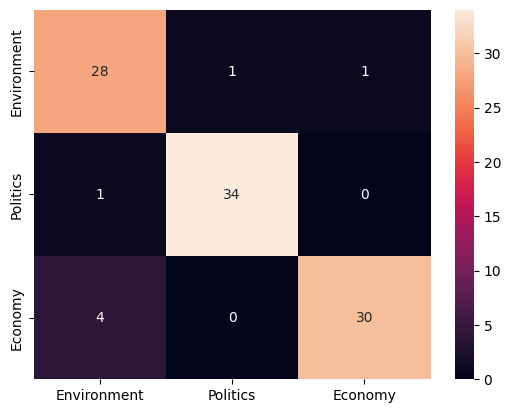

In [79]:
# create confusion matrix and show it
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt="g",
            xticklabels=labels, yticklabels=labels)

### Testing the model with some imaginary e-mails

In [ ]:
#This is a confusion matrix visualized as a heatmap.
#Most predictions are correct, as seen on the diagonal values: 28 (Environment), 34 (Politics), and 30 (Economy).
#Misclassifications are minimal, with only a few off-diagonal values like 4 (Economy as Environment).

In [80]:
# switch to decimal format
np.set_printoptions(precision=8, suppress=True)

In [81]:
# you can have multiple messages here!
sample_messages = ["Emran Emon recognised as ‘Sports Hero’",
                   "Leaders gather for an Economy Technology  to address the challenges of climate change, discussing strategies for mitigation, adaptation, and global cooperation.",
                   "Timothee Chalamet and Demi Moore among winners at SAG Awards - a major Oscars predictor",
                   "Hope for koalas after bushfires - After millions of koalas died in bushfires that swept through Australia, the species now has a glimmer of hope."]

# vectorize the new messages and predict the values
processed_text = vectorizer.transform(sample_messages)
results = model.predict_proba(processed_text)

In [82]:
print("Results for the Naive-Bayes and news article headline classification!")

# amount of the test messages above
amount = len(results)

# loop through each message
for index in range(amount):
    
    row = results[index]
    result = np.argmax(row)
    result_text = labels[result]

    print()
    print(sample_messages[index])
    print(row.astype(float))
    print(result_text)
    print()

Results for the Naive-Bayes and news article headline classification!

Emran Emon recognised as ‘Sports Hero’
[0.53764645 0.00312726 0.45922629]
Environment


Leaders gather for an Economy Technology  to address the challenges of climate change, discussing strategies for mitigation, adaptation, and global cooperation.
[0. 1. 0.]
Politics


Timothee Chalamet and Demi Moore among winners at SAG Awards - a major Oscars predictor
[0.11137734 0.36544079 0.52318187]
Economy


Hope for koalas after bushfires - After millions of koalas died in bushfires that swept through Australia, the species now has a glimmer of hope.
[0.03051031 0.00002862 0.96946108]
Economy



# End Ruslts


In [ ]:
#Prediction is based on probability distribution – Naive Bayes assigns class probabilities (e.g., [0.5376, 0.0031, 0.4592]) to each input, choosing the class with the highest value.
#Some classifications are incorrect – For example, “Emran Emon recognised as ‘Sports Hero’” was classified as Environment despite being more relevant to Economy (due to the second-highest probability).
# Clear cases yield confident predictions – The headline on climate change was confidently classified as Politics with [0, 1, 0], showing strong separation.
# Model struggles with ambiguity or context – “Hope for koalas after bushfires” was classified as Economy, likely due to overlap in terms,  reflecting a limitation of Naive Bayes in handling context.